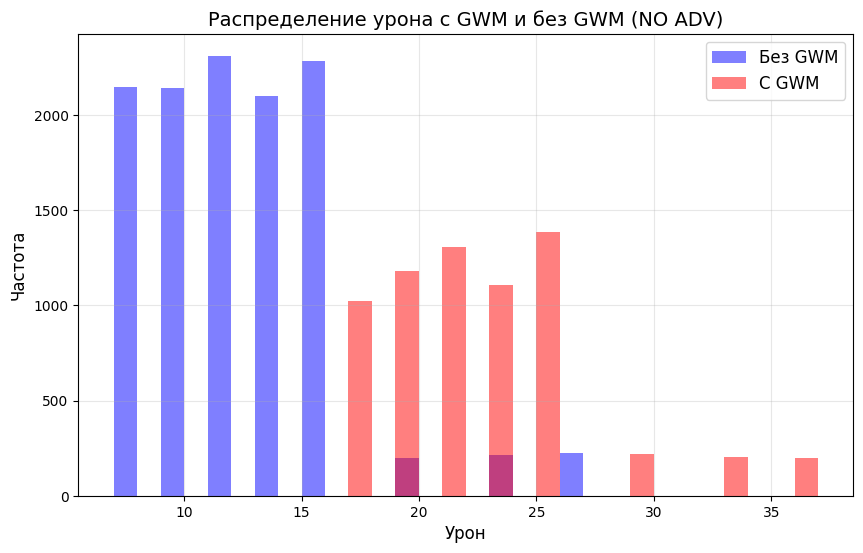

13.6019
14.783
Dif (on - off) is 1.181099999999999
20.8484
27.6056
Dif (on - off) is 6.757199999999997 (ADV)
14.8824
27.3997
Dif (on - charger) is 12.517299999999999 (ADV)


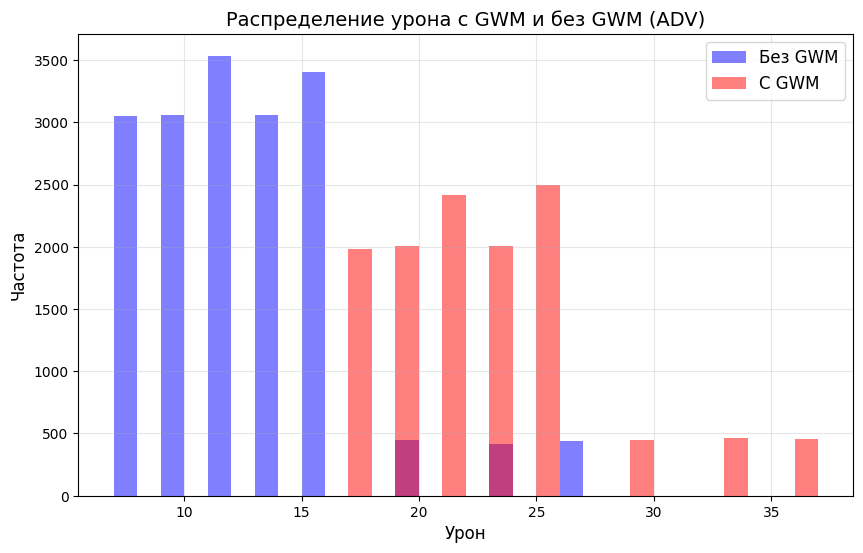

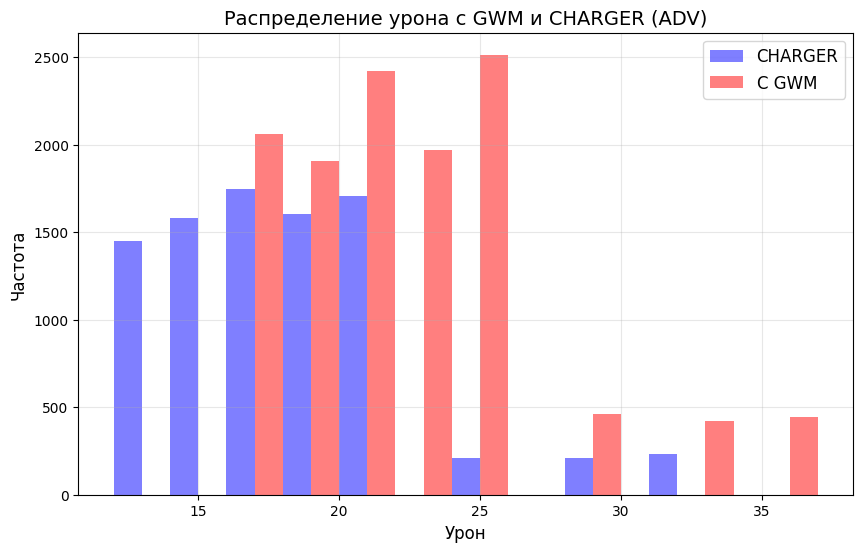

In [21]:
import random
import matplotlib.pyplot as plt
n = 10000
stat_mod = 3
prof_mod = 3


def calc_avg_dmg(mode, gwm_a, gwm_d,ac, ats):
    total_dmg = []
    hp = 70
    hp_var = hp
    for _ in range(n):
            num_a = ats
            b_action = 1
            while num_a != 0:
                if mode == "lesser":
                    ndice = min(random.randint(1, 20), random.randint(1, 20))
                elif mode == "greater":
                    ndice = max(random.randint(1, 20), random.randint(1, 20))
                else:
                    ndice = random.randint(1, 20)

                aroll = ndice + stat_mod + prof_mod - gwm_a
                crit_mod = 1
                if ndice == 20:
                    crit_mod = 2
                    aroll = ac + 1
                    if b_action != 0:
                        num_a += 1
                        b_action -= 1
                if aroll > ac:
                    dmg = random.randint(2, 6) * 2 * crit_mod + stat_mod + gwm_d
                    total_dmg.append(dmg)
                    if dmg >= hp_var and b_action != 0 and gwm_a == 5:
                        num_a += 1
                        b_action -=1
                    hp_var -= dmg
                if hp_var <= 0:
                    hp_var = hp
                num_a -= 1
    return total_dmg

dmg_data_gwm_on = calc_avg_dmg("n", 5, 10, 15, 2)
dmg_data_gwm_off = calc_avg_dmg("nr", 0, 0, 15, 2)

plt.figure(figsize=(10, 6))


plt.hist(dmg_data_gwm_off, bins=20, alpha=0.5, label="Без GWM", color="blue")
plt.hist(dmg_data_gwm_on, bins=20, alpha=0.5, label="С GWM", color="red")


plt.title("Распределение урона с GWM и без GWM (NO ADV)", fontsize=14)
plt.xlabel("Урон", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)


plt.show()

print(sum(dmg_data_gwm_off) / n)
print(sum(dmg_data_gwm_on) / n)
print(f"Dif (on - off) is {sum(dmg_data_gwm_on) / n - sum(dmg_data_gwm_off) / n}")

dmg_data_gwm_on = calc_avg_dmg("greater", 5, 10, 15, 2)
dmg_data_gwm_off = calc_avg_dmg("greater", 0, 0, 15, 2)

plt.figure(figsize=(10, 6))


plt.hist(dmg_data_gwm_off, bins=20, alpha=0.5, label="Без GWM", color="blue")
plt.hist(dmg_data_gwm_on, bins=20, alpha=0.5, label="С GWM", color="red")


plt.title("Распределение урона с GWM и без GWM (ADV)", fontsize=14)
plt.xlabel("Урон", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

print(sum(dmg_data_gwm_off) / n)
print(sum(dmg_data_gwm_on) / n)
print(f"Dif (on - off) is {sum(dmg_data_gwm_on) / n - sum(dmg_data_gwm_off) / n} (ADV)")

dmg_data_gwm_on = calc_avg_dmg("greater", 5, 10, 15, 2)
dmg_data_gwm_off = calc_avg_dmg("greater", 0, 5, 15, 1)

plt.figure(figsize=(10, 6))


plt.hist(dmg_data_gwm_off, bins=20, alpha=0.5, label="CHARGER", color="blue")
plt.hist(dmg_data_gwm_on, bins=20, alpha=0.5, label="С GWM", color="red")


plt.title("Распределение урона с GWM и CHARGER (ADV)", fontsize=14)
plt.xlabel("Урон", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

print(sum(dmg_data_gwm_off) / n)
print(sum(dmg_data_gwm_on) / n)
print(f"Dif (on - charger) is {sum(dmg_data_gwm_on) / n - sum(dmg_data_gwm_off) / n} (ADV)")




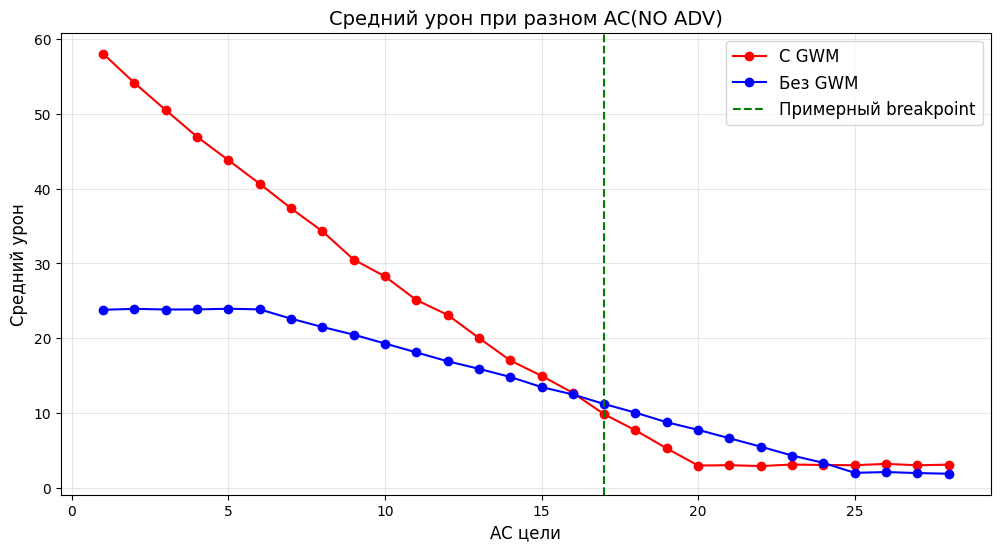

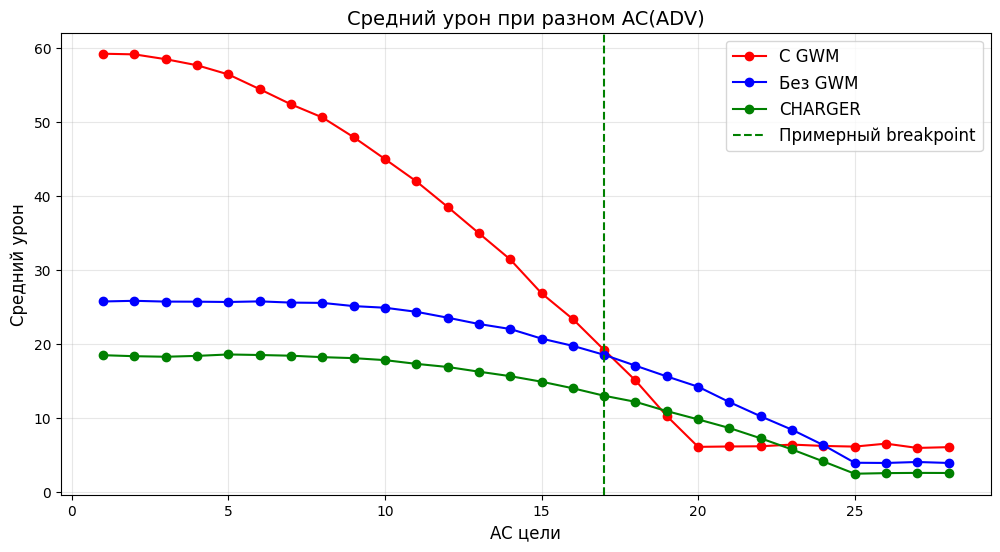

In [23]:
ac_values = range(1,29)
dmg_per_ac_gwm_on = []
dmg_per_ac_gwm_off = []
for ac in ac_values:
    dmg_per_ac_gwm_on.append(sum(calc_avg_dmg("n", 5, 10, ac, 2)) / n)
    dmg_per_ac_gwm_off.append(sum(calc_avg_dmg("n", 0, 0, ac, 2)) / n)
plt.figure(figsize=(12, 6))
plt.plot(ac_values, dmg_per_ac_gwm_on, label="С GWM", color="red", marker="o")
plt.plot(ac_values, dmg_per_ac_gwm_off, label="Без GWM", color="blue", marker="o")
plt.axvline(x=17, color="green", linestyle="--", label="Примерный breakpoint")

plt.title("Средний урон при разном AC(NO ADV)", fontsize=14)
plt.xlabel("AC цели", fontsize=12)
plt.ylabel("Средний урон", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

dmg_per_ac_gwm_on = []
dmg_per_ac_gwm_off = []
dmg_per_ac_charger = []
for ac in ac_values:
    dmg_per_ac_gwm_on.append(sum(calc_avg_dmg("greater", 5, 10, ac, 2)) / n)
    dmg_per_ac_gwm_off.append(sum(calc_avg_dmg("greater", 0, 0, ac, 2)) / n)
    dmg_per_ac_charger.append(sum(calc_avg_dmg("greater", 0, 5, ac, 1)) / n)
plt.figure(figsize=(12, 6))
plt.plot(ac_values, dmg_per_ac_gwm_on, label="С GWM", color="red", marker="o")
plt.plot(ac_values, dmg_per_ac_gwm_off, label="Без GWM", color="blue", marker="o")
plt.plot(ac_values, dmg_per_ac_charger, label="CHARGER", color="green", marker="o")

plt.axvline(x=17, color="green", linestyle="--", label="Примерный breakpoint")

plt.title("Средний урон при разном AC(ADV)", fontsize=14)
plt.xlabel("AC цели", fontsize=12)
plt.ylabel("Средний урон", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()